In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
train_df=pd.read_csv('Data_Train.csv')
test_df=pd.read_csv('Test_set.csv')

In [3]:
#By the help of append fuction we are able to add train and test 

In [4]:
df=train_df.append(test_df)

In [5]:
df

TITLE  RESTAURANT_ID  \
0         CASUAL DINING         9438.0   
1     CASUAL DINING,BAR        13198.0   
2         CASUAL DINING        10915.0   
3           QUICK BITES         6346.0   
4        DESSERT PARLOR        15387.0   
...                 ...            ...   
2666                NaN            NaN   
2667                NaN            NaN   
2668                NaN            NaN   
2669                NaN            NaN   
2670                NaN            NaN   

                                        CUISINES  \
0                    Malwani, Goan, North Indian   
1                 Asian, Modern Indian, Japanese   
2     North Indian, Chinese, Biryani, Hyderabadi   
3                               Tibetan, Chinese   
4                                       Desserts   
...                                          ...   
2666                                         NaN   
2667                                         NaN   
2668                                         NaN   
2669                                         NaN   
2670                                         NaN   

                                        TIME     CITY        LOCALITY RATING  \
0     11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)    Thane  Dombivali East    3.6   
1                       6pm – 11pm (Mon-Sun)  Chennai       Ramapuram    4.2   
2        11am – 3:30pm, 7pm – 11pm (Mon-Sun)  Chennai      Saligramam    3.8   
3                    11:30am – 1am (Mon-Sun)   Mumbai     Bandra West    4.1   
4                       11am – 1am (Mon-Sun)   Mumbai     Lower Parel    3.8   
...                                      ...      ...             ...    ...   
2666                                     NaN      NaN             NaN    NaN   
2667                                     NaN      NaN             NaN    NaN   
2668                                     NaN      NaN             NaN    NaN   
2669                                     NaN      NaN             NaN    NaN   
2670                                     NaN      NaN             NaN    NaN   

          VOTES    COST            Airline Date_of_Journey   Source  \
0      49 votes  1200.0                NaN             NaN      NaN   
1      30 votes  1500.0                NaN             NaN      NaN   
2     221 votes   800.0                NaN             NaN      NaN   
3      24 votes   800.0                NaN             NaN      NaN   
4     165 votes   300.0                NaN             NaN      NaN   
...         ...     ...                ...             ...      ...   
2666        NaN     NaN          Air India       6/06/2019  Kolkata   
2667        NaN     NaN             IndiGo      27/03/2019  Kolkata   
2668        NaN     NaN        Jet Airways       6/03/2019    Delhi   
2669        NaN     NaN          Air India       6/03/2019    Delhi   
2670        NaN     NaN  Multiple carriers      15/06/2019    Delhi   

     Destination            Route Dep_Time  Arrival_Time Duration Total_Stops  \
0            NaN              NaN      NaN           NaN      NaN         NaN   
1            NaN              NaN      NaN           NaN      NaN         NaN   
2            NaN              NaN      NaN           NaN      NaN         NaN   
3            NaN              NaN      NaN           NaN      NaN         NaN   
4            NaN              NaN      NaN           NaN      NaN         NaN   
...          ...              ...      ...           ...      ...         ...   
2666    Banglore  CCU ? DEL ? BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
2667    Banglore        CCU ? BLR    14:20         16:55   2h 35m    non-stop   
2668      Cochin  DEL ? BOM ? COK    21:50  04:25 07 Mar   6h 35m      1 stop   
2669      Cochin  DEL ? BOM ? COK    04:00         19:15  15h 15m      1 stop   
2670      Cochin  DEL ? BOM ? COK    04:55         19:15  14h 20m      1 stop   

     Additional_Info  
0                NaN  
1                NaN  
2                NaN  
3        

In [6]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST', 'Airline', 'Date_of_Journey', 'Source',
       'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info'],
      dtype='object')

Now we are separating the Date_of_journet columns and convert the column into timestamp and divide the columns into
date, month and year.

In [7]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [8]:
# Now tha date-of-journey split into 3 variables(Date,Month,Year)

In [9]:
#Now spliting the column of Arrival Time in Arrival Hour and Arrival Minute 

In [10]:
df['Arrival_Time']=df['Arrival_Time'].str.split('').str[0]

In [11]:
df['Arrival_Hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute']=df['Arrival_Time'].str.split(':').str[1]



In [12]:
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')

In [13]:
#Now from above we have convert the non stop into the 0 stop

In [14]:
df['Stop']=df['Total_Stops'].str.split('').str[0]

In [15]:
df['Route_1']=df['Route'].str.split('').str[0]
df['Route_2']=df['Route'].str.split('').str[1]
df['Route_3']=df['Route'].str.split('').str[2]
df['Route_4']=df['Route'].str.split('').str[3]
df['Route_5']=df['Route'].str.split('').str[4]

In [16]:
df['Route_1'].fillna("None",inplace=True)
df['Route_2'].fillna("None",inplace=True)
df['Route_3'].fillna("None",inplace=True)
df['Route_4'].fillna("None",inplace=True)
df['Route_5'].fillna("None",inplace=True)

In [17]:
df.dtypes

TITLE               object
RESTAURANT_ID      float64
CUISINES            object
TIME                object
CITY                object
LOCALITY            object
RATING              object
VOTES               object
COST               float64
Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Date                object
Month               object
Year                object
Arrival_Hour        object
Arrival_Minute     float64
Stop                object
Route_1             object
Route_2             object
Route_3             object
Route_4             object
Route_5             object
dtype: object

In [18]:
df.columns 

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST', 'Airline', 'Date_of_Journey', 'Source',
       'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Date', 'Month', 'Year',
       'Arrival_Hour', 'Arrival_Minute', 'Stop', 'Route_1', 'Route_2',
       'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [19]:
df = df.astype(str) 
print(df.dtypes)

TITLE              object
RESTAURANT_ID      object
CUISINES           object
TIME               object
CITY               object
LOCALITY           object
RATING             object
VOTES              object
COST               object
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Date               object
Month              object
Year               object
Arrival_Hour       object
Arrival_Minute     object
Stop               object
Route_1            object
Route_2            object
Route_3            object
Route_4            object
Route_5            object
dtype: object


In [20]:
#Now i will convert the datatype with the help of label encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Airline']=le.fit_transform(df['Airline'])
df['Date_of_Journey']=le.fit_transform(df['Date_of_Journey'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['Route']=le.fit_transform(df['Route'])
df['Arrival_Time']=le.fit_transform(df['Arrival_Time'])
df['Duration']=le.fit_transform(df['Duration'])
df['Total_Stops']=le.fit_transform(df['Total_Stops'])
df['Additional_Info']=le.fit_transform(df['Additional_Info'])
df['Date']=le.fit_transform(df['Date'])
df['Month']=le.fit_transform(df['Month'])
df['Year']=le.fit_transform(df['Year'])
df['Arrival_Hour']=le.fit_transform(df['Arrival_Hour'])
df['Stop']=le.fit_transform(df['Stop'])
#df['Dep_Hour']=le.fit_transform(df['Dep_Hour'])
df['Arrival_Minute']=le.fit_transform(df['Arrival_Minute'])
df['Route_1']=le.fit_transform(df['Route_1'])
df['Route_2']=le.fit_transform(df['Route_2'])
df['Route_3']=le.fit_transform(df['Route_3'])
df['Route_4']=le.fit_transform(df['Route_4'])
df['Route_5']=le.fit_transform(df['Route_5'])
df['TITLE']=le.fit_transform(df['TITLE'])
df['RESTAURANT_ID']=le.fit_transform(df['RESTAURANT_ID'])
df['CUISINES']=le.fit_transform(df['CUISINES'])
df['TIME']=le.fit_transform(df['TIME'])
df['CITY']=le.fit_transform(df['CITY'])
df['LOCALITY']=le.fit_transform(df['LOCALITY'])
df['VOTES']=le.fit_transform(df['VOTES'])
df['COST']=le.fit_transform(df['COST'])
df['RATING']=le.fit_transform(df['RATING'])

In [22]:
df.dtypes

TITLE               int32
RESTAURANT_ID       int32
CUISINES            int32
TIME                int32
CITY                int32
LOCALITY            int32
RATING              int32
VOTES               int32
COST                int32
Airline             int32
Date_of_Journey     int32
Source              int32
Destination         int32
Route               int32
Dep_Time           object
Arrival_Time        int32
Duration            int32
Total_Stops         int32
Additional_Info     int32
Date                int32
Month               int32
Year                int32
Arrival_Hour        int32
Arrival_Minute      int32
Stop                int32
Route_1             int32
Route_2             int32
Route_3             int32
Route_4             int32
Route_5             int32
dtype: object

In [23]:
#The Route ,total-stop and the stop now we are dropping these columns 

In [24]:
df

TITLE  RESTAURANT_ID  CUISINES  TIME  CITY  LOCALITY  RATING  VOTES  \
0        31          11416      2627   739   320       285      17   1278   
1        33           2729       289  1885    67      1046      23    950   
2        31            800      2976   661    67      1101      19    712   
3        95           8827      4130   275   222       136      22    787   
4        50           4591      1766   615   222       620      19    470   
...     ...            ...       ...   ...   ...       ...     ...    ...   
2666    113          11892      4155  2689   354      1406      32   1847   
2667    113          11892      4155  2689   354      1406      32   1847   
2668    113          11892      4155  2689   354      1406      32   1847   
2669    113          11892      4155  2689   354      1406      32   1847   
2670    113          11892      4155  2689   354      1406      32   1847   

      COST  Airline  ...  Month  Year  Arrival_Hour  Arrival_Minute Stop  \
0        7       11  ...      4     1             1               0    1   
1       18       11  ...      4     1             1               0    1   
2       81       11  ...      4     1             1               0    1   
3       81       11  ...      4     1             1               0    1   
4       43       11  ...      4     1             1               0    1   
...    ...      ...  ...    ...   ...           ...             ...  ...   
2666    86        1  ...      3     0             0               0    0   
2667    86        3  ...      0     0             0               0    0   
2668    86        4  ...      0     0             0               0    0   
2669    86        1  ...      0     0             0               0    0   
2670    86        6  ...      3     0             0               0    0   

      Route_1  Route_2  Route_3  Route_4  Route_5  
0           1        4        4        3        1  
1           1        4        4        3        1  
2           1        4        4        3        1  
3           1        4        4        3        1  
4           1        4        4        3        1  
...       ...      ...      ...      ...      ...  
2666        0        1        1        5        0  
2667        0        1        1        5        0  
2668        0        2        2        1        0  
2669        0        2        2        1        0  
2670        0        2        2        1        0  

[15361 rows x 30 columns]

In [25]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST', 'Airline', 'Date_of_Journey', 'Source',
       'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Date', 'Month', 'Year',
       'Arrival_Hour', 'Arrival_Minute', 'Stop', 'Route_1', 'Route_2',
       'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [26]:
df=df.replace(np.NaN,0)
# Replacing the NaN value with the 0

In [27]:
df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY               0
LOCALITY           0
RATING             0
VOTES              0
COST               0
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Date               0
Month              0
Year               0
Arrival_Hour       0
Arrival_Minute     0
Stop               0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

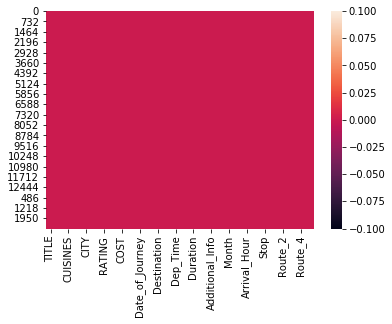

In [28]:
sns.heatmap(df.isnull())

In [29]:
df.describe()

TITLE  RESTAURANT_ID      CUISINES          TIME          CITY  \
count  15361.000000   15361.000000  15361.000000  15361.000000  15361.000000   
mean      68.774364    6984.013866   2569.013476   1442.457197    181.188399   
std       36.033750    3842.896337   1314.225136    892.921489    111.286435   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%       31.000000    3611.000000   1425.000000    555.000000     67.000000   
50%       87.000000    7204.000000   2850.000000   1277.000000    173.000000   
75%       95.000000   10787.000000   3801.000000   2307.000000    252.000000   
max      113.000000   11892.000000   4155.000000   2689.000000    359.000000   

           LOCALITY        RATING         VOTES          COST       Airline  \
count  15361.000000  15361.000000  15361.000000  15361.000000  15361.000000   
mean     790.219191     21.093418   1190.764664     54.010676      9.778074   
std      462.994901      7.525049    577.757028     25.831443      2.830250   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      394.000000     17.000000    727.000000     36.000000     11.000000   
50%      695.000000     20.000000   1261.000000     57.000000     11.000000   
75%     1305.000000     26.000000   1847.000000     77.000000     11.000000   
max     1416.000000     32.000000   1847.000000     86.000000     11.000000   

       ...         Month          Year  Arrival_Hour  Arrival_Minute  \
count  ...  15361.000000  15361.000000  15361.000000         15361.0   
mean   ...      3.603281      0.826118      0.826118             0.0   
std    ...      0.993022      0.379020      0.379020             0.0   
min    ...      0.000000      0.000000      0.000000             0.0   
25%    ...      4.000000      1.000000      1.000000             0.0   
50%    ...      4.000000      1.000000      1.000000             0.0   
75%    ...      4.000000      1.000000      1.000000             0.0   
max    ...      4.000000      1.000000      1.000000             0.0   

               Stop       Route_1       Route_2       Route_3       Route_4  \
count  15361.000000  15361.000000  15361.000000  15361.000000  15361.000000   
mean       0.826118      0.826118      3.514420      3.668706      2.952737   
std        0.379020      0.379020      1.120333      0.854867      0.756985   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      4.000000      4.000000      3.000000   
50%        1.000000      1.000000      4.000000      4.000000      3.000000   
75%        1.000000      1.000000      4.000000      4.000000      3.000000   
max        1.000000      1.000000      4.000000      5.000000      5.000000   

            Route_5  
count  15361.000000  
mean       0.826118  
std        0.379020  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 29 columns]

In [30]:
#1) The 50TH percentile is more than the mean percentile in all columns from the above calculation
#2)Their is large difference in 75% and max in Airline and in COST

In [31]:
dfcor=df.corr()
dfcor

TITLE  RESTAURANT_ID  CUISINES      TIME      CITY  \
TITLE            1.000000       0.343365  0.480278  0.394877  0.400403   
RESTAURANT_ID    0.343365       1.000000  0.318073  0.374191  0.409602   
CUISINES         0.480278       0.318073  1.000000  0.421604  0.406650   
TIME             0.394877       0.374191  0.421604  1.000000  0.451768   
CITY             0.400403       0.409602  0.406650  0.451768  1.000000   
LOCALITY         0.368616       0.360677  0.347919  0.387389  0.473545   
RATING           0.349639       0.366470  0.344190  0.405996  0.491956   
VOTES            0.312833       0.314356  0.286556  0.354498  0.394711   
COST             0.287779       0.345318  0.290309  0.317777  0.423847   
Airline         -0.529923      -0.551433 -0.521048 -0.602757 -0.670469   
Date_of_Journey -0.466063      -0.484981 -0.458258 -0.530120 -0.589673   
Source          -0.517537      -0.538544 -0.508869 -0.588668 -0.654798   
Destination     -0.530894      -0.552443 -0.522003 -0.603861 -0.671697   
Route           -0.471305      -0.490435 -0.463412 -0.536082 -0.596304   
Arrival_Time    -0.563099      -0.585956 -0.553669 -0.640493 -0.712444   
Duration        -0.464308      -0.483155 -0.456532 -0.528123 -0.587452   
Total_Stops     -0.554433      -0.576938 -0.545148 -0.630636 -0.701480   
Additional_Info -0.480098      -0.499586 -0.472058 -0.546084 -0.607430   
Date            -0.473762      -0.492993 -0.465828 -0.538877 -0.599414   
Month           -0.490362      -0.510266 -0.482150 -0.557758 -0.620416   
Year            -0.563099      -0.585956 -0.553669 -0.640493 -0.712444   
Arrival_Hour    -0.563099      -0.585956 -0.553669 -0.640493 -0.712444   
Arrival_Minute        NaN            NaN       NaN       NaN       NaN   
Stop            -0.563099      -0.585956 -0.553669 -0.640493 -0.712444   
Route_1         -0.563099      -0.585956 -0.553669 -0.640493 -0.712444   
Route_2         -0.531994      -0.553588 -0.523084 -0.605112 -0.673089   
Route_3         -0.475672      -0.494980 -0.467706 -0.541049 -0.601829   
Route_4         -0.076634      -0.079745 -0.075351 -0.087167 -0.096959   
Route_5         -0.563099      -0.585956 -0.553669 -0.640493 -0.712444   

                 LOCALITY    RATING     VOTES      COST   Airline  ...  \
TITLE            0.368616  0.349639  0.312833  0.287779 -0.529923  ...   
RESTAURANT_ID    0.360677  0.366470  0.314356  0.345318 -0.551433  ...   
CUISINES         0.347919  0.344190  0.286556  0.290309 -0.521048  ...   
TIME             0.387389  0.405996  0.354498  0.317777 -0.602757  ...   
CITY             0.473545  0.491956  0.394711  0.423847 -0.670469  ...   
LOCALITY         1.000000  0.396833  0.324827  0.349642 -0.574246  ...   
RATING           0.396833  1.000000  0.334578  0.345758 -0.625788  ...   
VOTES            0.324827  0.334578  1.000000  0.270272 -0.490414  ...   
COST             0.349642  0.345758  0.270272  1.000000 -0.534693  ...   
Airline         -0.574246 -0.625788 -0.490414 -0.534693  1.000000  ...   
Date_of_Journey -0.505045 -0.550376 -0.431315 -0.470259  0.782474  ...   
Source          -0.560824 -0.611161 -0.478951 -0.522195  0.860791  ...   
Destination     -0.575298 -0.626935 -0.491312 -0.535672  0.891050  ...   
Route           -0.510725 -0.556566 -0.436166 -0.475547  0.792111  ...   
Arrival_Time    -0.610197 -0.664966 -0.521116 -0.568168  0.941083  ...   
Duration        -0.503143 -0.548303 -0.429691 -0.468487  0.781251  ...   
Total_Stops     -0.600806 -0.654733 -0.513096 -0.559424  0.912844  ...   
Additional_Info -0.520254 -0.566950 -0.444303 -0.484420  0.787448  ...   
Date            -0.513388 -0.559468 -0.438440 -0.478027  0.795032  ...   
Month           -0.531376 -0.579071 -0.453802 -0.494776  0.827685  ...   
Year            -0.610197 -0.664966 -0.521116 -0.568168  0.941083  ...   
Arrival_Hour    -0.610197 -0.664966 -0.521116 -0.568168  0.941083  ...   
Arrival_Minute        NaN       NaN       NaN       NaN       NaN  ...   
Stop            -0.6101

In [32]:
#Since in above we see that clearly year columns and Arrival_minute has no data so we will drop both the columns 

In [33]:
df=df.replace(np.NaN,0)
df=df.drop(['Year'],axis=1)
df=df.drop(['Arrival_Minute'],axis=1)

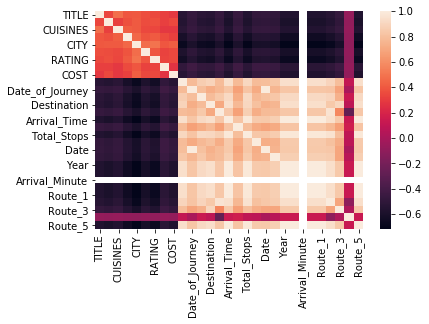

In [34]:
sns.heatmap(dfcor)

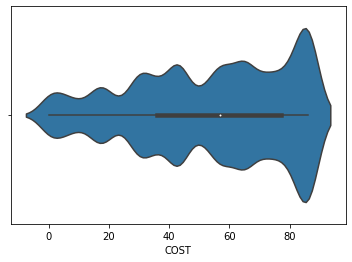

In [35]:
sns.violinplot(x='COST',data=df)
plt.show()

In [36]:
#Highest cost range was in between 90 and above

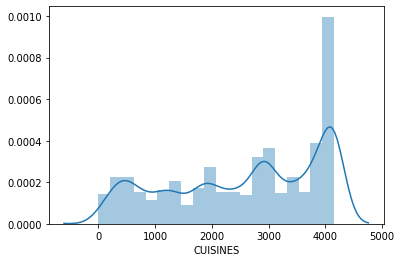

In [37]:
sns.distplot(df['CUISINES'],bins=20)
plt.show()

In [38]:
#The  4000 cuisines  is the higest cuisines are higher.

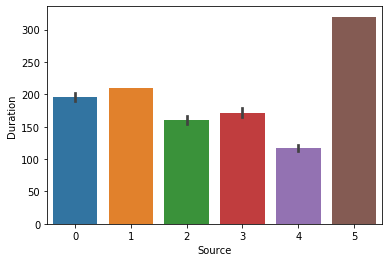

In [39]:
sns.barplot(x='Source',y='Duration',data=df)
plt.show()

In [40]:
# The duration time from the source is highest in 5 and than in 1.

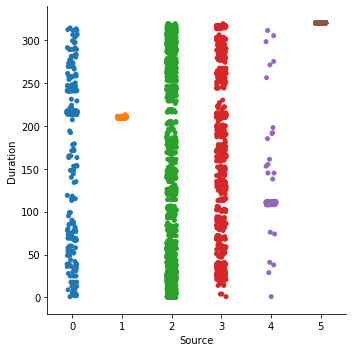

In [41]:
sns.catplot(x='Source',y='Duration',data=df)

In [42]:
df.skew()

TITLE             -0.265374
RESTAURANT_ID     -0.184307
CUISINES          -0.375374
TIME               0.084829
CITY               0.252688
LOCALITY           0.046300
RATING            -0.372094
VOTES             -0.413124
COST              -0.426124
Airline           -2.093417
Date_of_Journey   -2.699323
Source            -2.331842
Destination       -2.015250
Route             -2.758953
Arrival_Time      -1.721072
Duration          -2.810530
Total_Stops       -1.835382
Additional_Info   -3.177300
Date              -2.730294
Month             -2.627765
Arrival_Hour      -1.721072
Stop              -1.721072
Route_1           -1.721072
Route_2           -2.129345
Route_3           -2.270437
Route_4           -0.583380
Route_5           -1.721072
dtype: float64

In [43]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST', 'Airline', 'Date_of_Journey', 'Source',
       'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Date', 'Month', 'Arrival_Hour',
       'Stop', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [44]:
# Treating using log
skew = ('Airline', 'Date_of_Journey', 'Source', 'Destination', 
       'Arrival_Time', 'Duration', 'Additional_Info', 'Date', 'Month',
        'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5')

for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

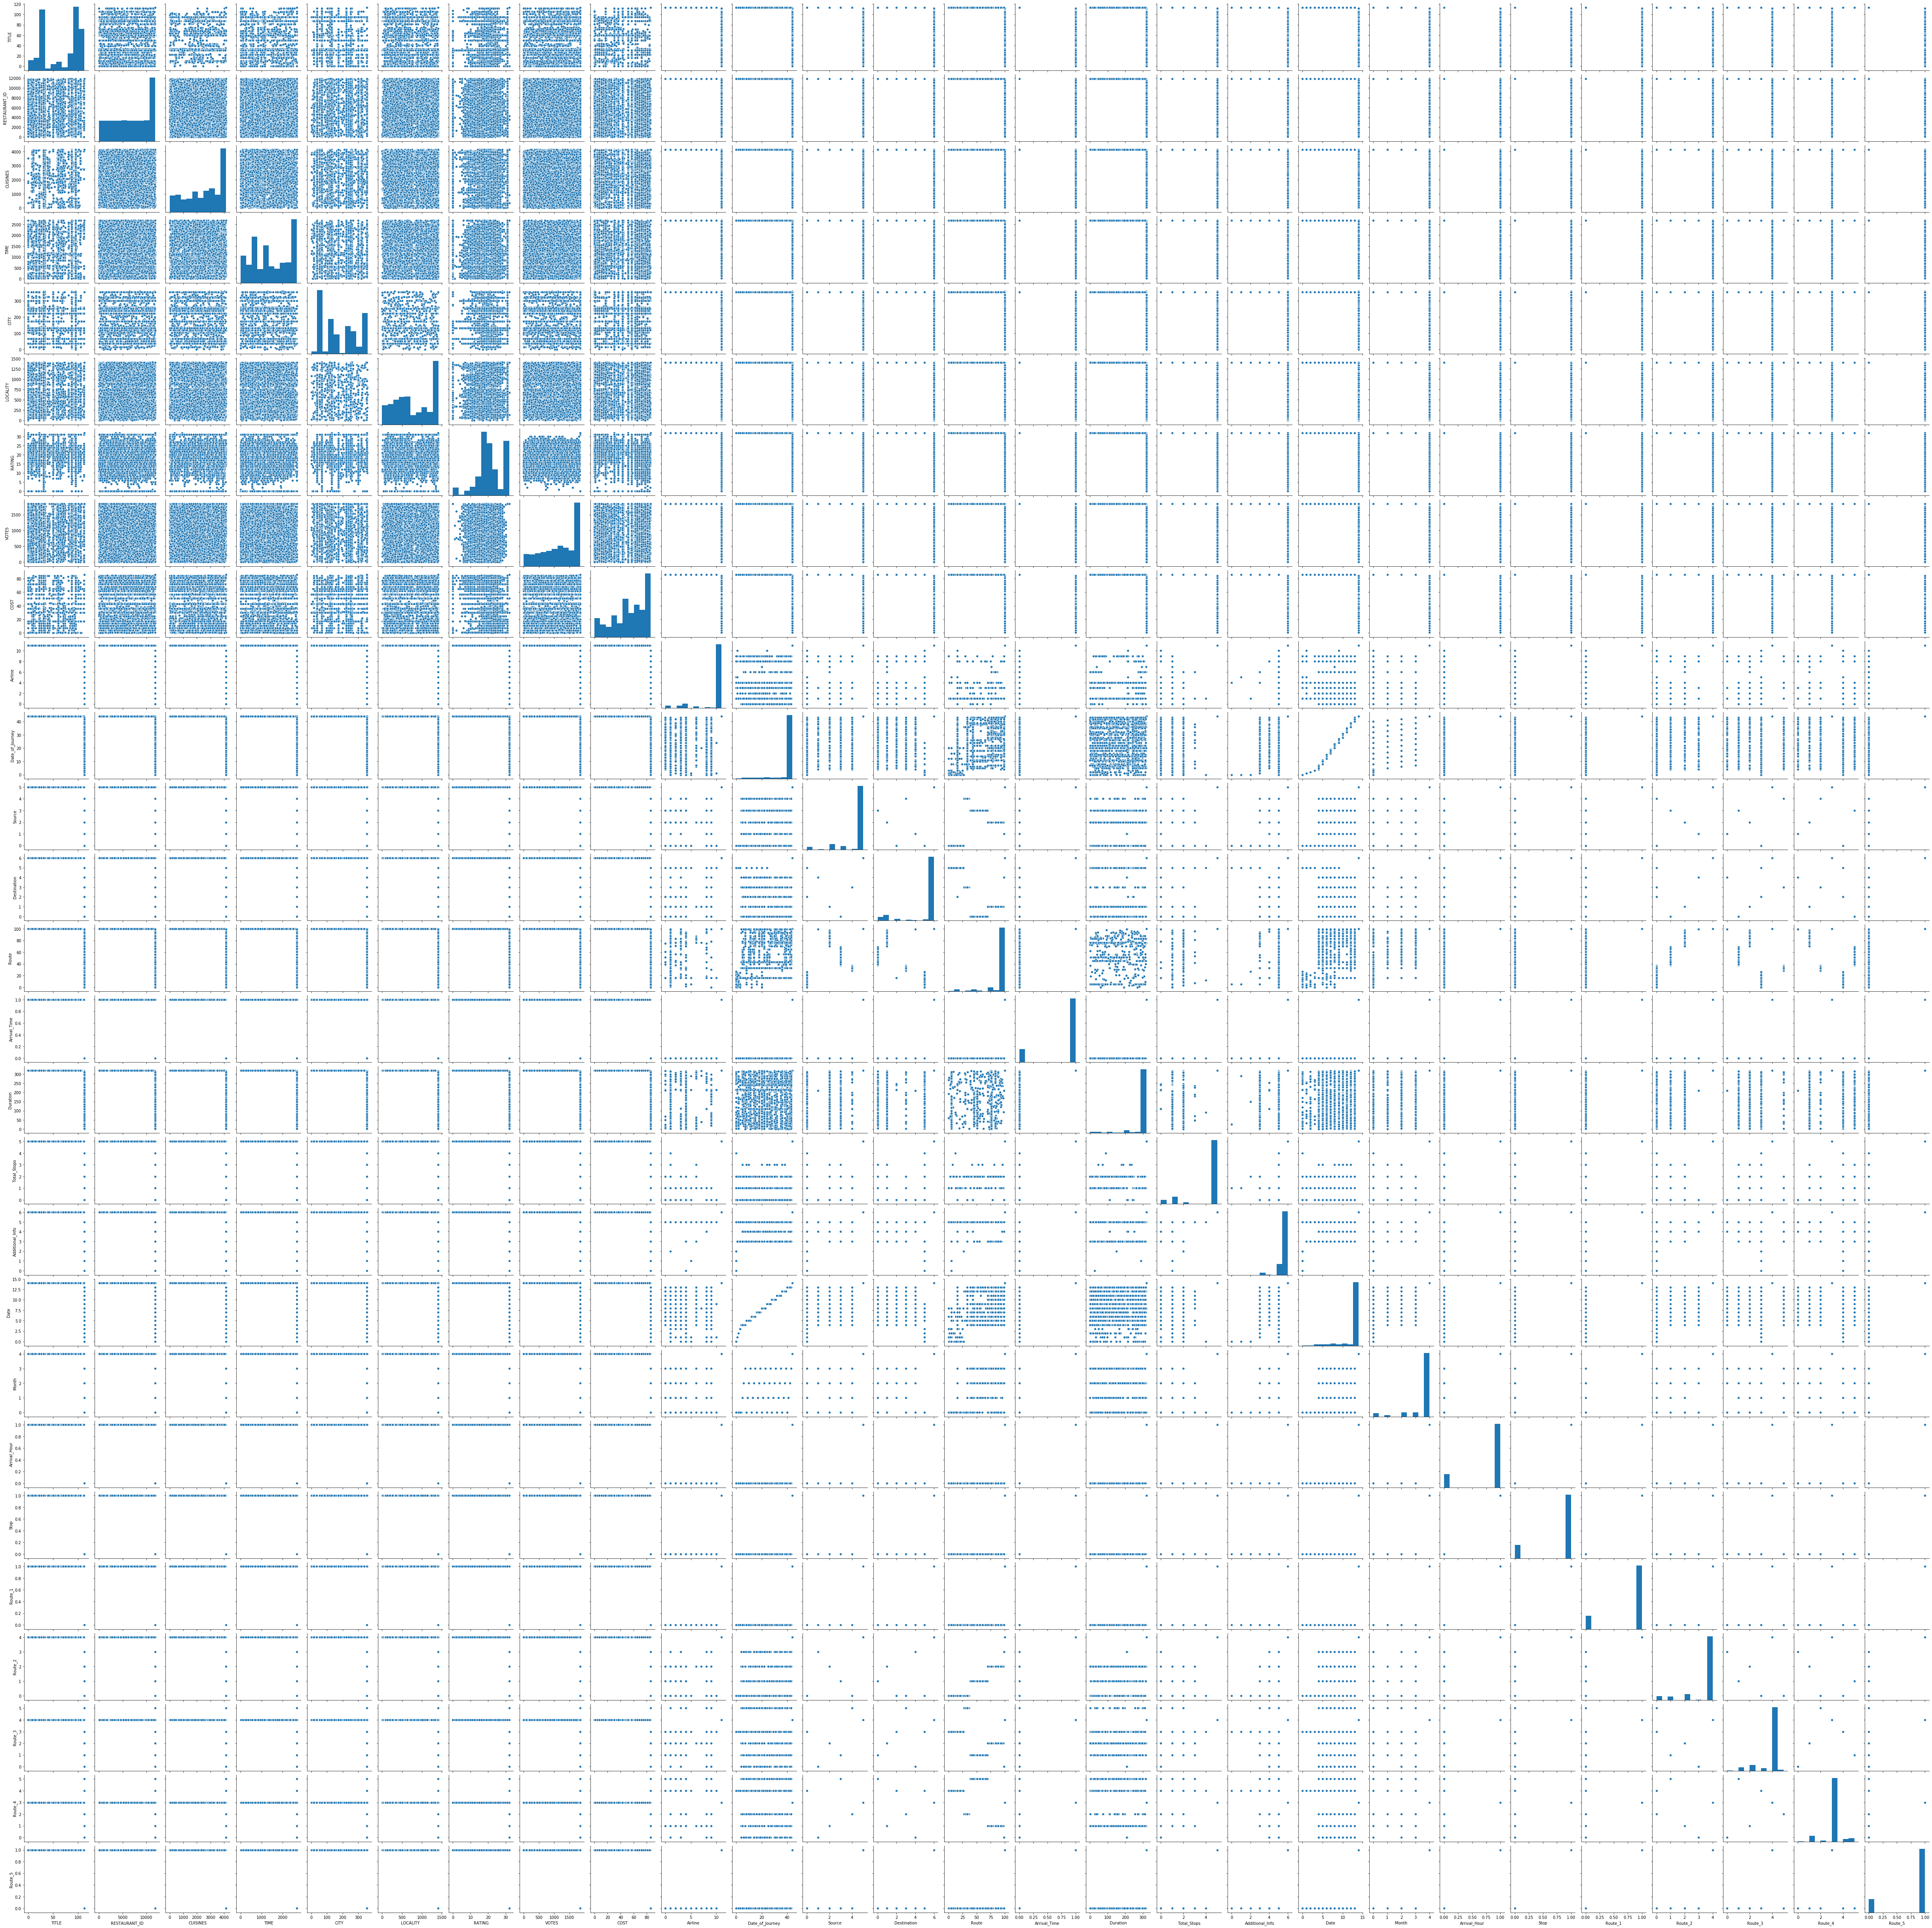

In [45]:
sns.pairplot(df)

In [46]:
df.shape

(15361, 28)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006774D95CC8>,
      dtype=object)

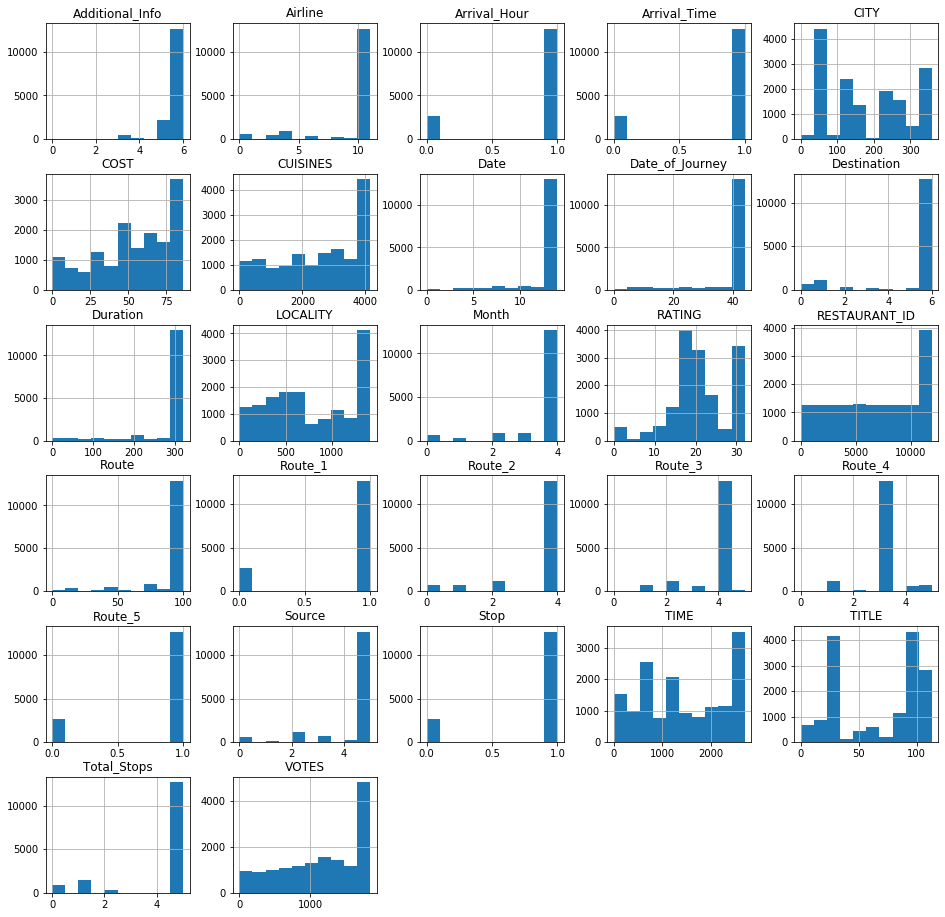

In [47]:
df.hist(figsize=(16,16))

In [58]:
df.dtypes

TITLE               int32
RESTAURANT_ID       int32
CUISINES            int32
TIME                int32
CITY                int32
LOCALITY            int32
RATING              int32
VOTES               int32
COST                int32
Airline             int32
Date_of_Journey     int32
Source              int32
Destination         int32
Route               int32
Dep_Time           object
Arrival_Time        int32
Duration            int32
Total_Stops         int32
Additional_Info     int32
Date                int32
Month               int32
Arrival_Hour        int32
Stop                int32
Route_1             int32
Route_2             int32
Route_3             int32
Route_4             int32
Route_5             int32
dtype: object

In [59]:
df.drop('Dep_Time',axis=1,inplace=True)

In [60]:
df_train = df[0:13354]

In [61]:
df_test = df[13354:]

Now spliting the columns with x and y and y will have the Price columns 
or main focus is to predict the price. So we take price as a target 

In [62]:
x=df_train.drop(['COST'],axis=1)
y=df_train.COST

In [63]:
x

TITLE  RESTAURANT_ID  CUISINES  TIME  CITY  LOCALITY  RATING  VOTES  \
0       31          11416      2627   739   320       285      17   1278   
1       33           2729       289  1885    67      1046      23    950   
2       31            800      2976   661    67      1101      19    712   
3       95           8827      4130   275   222       136      22    787   
4       50           4591      1766   615   222       620      19    470   
..     ...            ...       ...   ...   ...       ...     ...    ...   
659    113          11892      4155  2689   354      1406      32   1847   
660    113          11892      4155  2689   354      1406      32   1847   
661    113          11892      4155  2689   354      1406      32   1847   
662    113          11892      4155  2689   354      1406      32   1847   
663    113          11892      4155  2689   354      1406      32   1847   

     Airline  Date_of_Journey  ...  Additional_Info  Date  Month  \
0         11               44  ...                6    14      4   
1         11               44  ...                6    14      4   
2         11               44  ...                6    14      4   
3         11               44  ...                6    14      4   
4         11               44  ...                6    14      4   
..       ...              ...  ...              ...   ...    ...   
659        8                5  ...                5     4      1   
660        4               22  ...                3     8      2   
661        3               23  ...                5     8      3   
662        4                2  ...                5     2      0   
663        3               29  ...                5    10      1   

     Arrival_Hour  Stop  Route_1  Route_2  Route_3  Route_4  Route_5  
0               1     1        1        4        4        3        1  
1               1     1        1        4        4        3        1  
2               1     1        1        4        4        3        1  
3               1     1        1        4        4        3        1  
4               1     1        1        4        4        3        1  
..            ...   ...      ...      ...      ...      ...      ...  
659             0     0        0        1        1        5        0  
660             0     0        0        1        1        5        0  
661             0     0        0        1        1        5        0  
662             0     0        0        0        3        4        0  
663             0     0        0        2        2        1        0  

[13354 rows x 26 columns]

In [64]:
y

0       7
1      18
2      81
3      81
4      43
       ..
659    86
660    86
661    86
662    86
663    86
Name: COST, Length: 13354, dtype: int32

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([ 7, 18, 81, ..., 86, 86, 86], dtype=int64)

In [66]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corressponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [67]:
#Lets use Linear regression and check max r2 score corressponding to different random state
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to  42  is  0.13911783769946306
r2 score corresponding to  43  is  0.15074812850391828
r2 score corresponding to  44  is  0.12265474791204867
r2 score corresponding to  45  is  0.12116500288383625
r2 score corresponding to  46  is  0.1368310154251574
r2 score corresponding to  47  is  0.12237284305303342
r2 score corresponding to  48  is  0.13603968853413462
r2 score corresponding to  49  is  0.13981185788901418
r2 score corresponding to  50  is  0.12825062485477656
r2 score corresponding to  51  is  0.12362681867674274
r2 score corresponding to  52  is  0.12177454346583394
r2 score corresponding to  53  is  0.12107754446210894
r2 score corresponding to  54  is  0.13825676526433706
r2 score corresponding to  55  is  0.12645069121343422
r2 score corresponding to  56  is  0.12754121719374256
r2 score corresponding to  57  is  0.12181866340989178
r2 score corresponding to  58  is  0.13113310661159294
r2 score corresponding to  59  is  0.13344571529706817
r2 score co

In [68]:
#Lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors, cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 29}

In [69]:
#Lets use KNN regression and check max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=29)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to  42  is  0.15262215292463033
r2 score corresponding to  43  is  0.13039424681605138
r2 score corresponding to  44  is  0.10265605151307555
r2 score corresponding to  45  is  0.09506079323607763
r2 score corresponding to  46  is  0.11590798410575764
r2 score corresponding to  47  is  0.09583907685214099
r2 score corresponding to  48  is  0.13907269630238572
r2 score corresponding to  49  is  0.12115418477909856
r2 score corresponding to  50  is  0.10058969104837845
r2 score corresponding to  51  is  0.10630049720175161
r2 score corresponding to  52  is  0.11128987422741998
r2 score corresponding to  53  is  0.10216599715575836
r2 score corresponding to  54  is  0.11718490523693026
r2 score corresponding to  55  is  0.11241498821411189
r2 score corresponding to  56  is  0.10829306030094332
r2 score corresponding to  57  is  0.11888883044501419
r2 score corresponding to  58  is  0.1289922094083572
r2 score corresponding to  59  is  0.12041465747334434
r2 score co

In [70]:
#Lets check the mean r2 score of both LinearRegression model and knn regression
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression :",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=10,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=10,scoring="r2").std())


Mean r2 score for Linear Regression : -0.056323708542298026
standard deviation in r2 score for Linear Regression: 0.33793766970779865

Mean r2 score for KNN Regression: -0.024070106911357247
standard deviation in r2 score for KNN Regression:  0.11361060094439618


In [72]:
#Lets check laso Regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [73]:
#Lets check max_r2 score whenwe use lasso
lsreg=Lasso(alpha=1)
r_stat=maxr2_score(lsreg,x,y)

r2 score corresponding to  42  is  0.12626744203448548
r2 score corresponding to  43  is  0.14110419109692274
r2 score corresponding to  44  is  0.11236620078440607
r2 score corresponding to  45  is  0.10943230245177915
r2 score corresponding to  46  is  0.12459453751477167
r2 score corresponding to  47  is  0.11127217843699433
r2 score corresponding to  48  is  0.1218496403660454
r2 score corresponding to  49  is  0.13113488137306795
r2 score corresponding to  50  is  0.11842133490657492
r2 score corresponding to  51  is  0.1137717823416402
r2 score corresponding to  52  is  0.1128889343152385
r2 score corresponding to  53  is  0.11090684723985433
r2 score corresponding to  54  is  0.12772751500666923
r2 score corresponding to  55  is  0.1160879447350146
r2 score corresponding to  56  is  0.11612716920773292
r2 score corresponding to  57  is  0.10810425052450856
r2 score corresponding to  58  is  0.11949391190370884
r2 score corresponding to  59  is  0.12487732617869785
r2 score corre

In [74]:
#Now we will try to use gradient boosting technique
#for getting best set of parameters we will use grid search
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000,]}
clr = GridSearchCV(gbr, parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [81]:
#Now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=1,n_estimators=500)
print("Mean r2 score for gradiant boosting Regression: ",cross_val_score(gbr,x,y,cv=10,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression: ",cross_val_score(gbr,x,y,cv=10,scoring="r2").std())

Mean r2 score for gradiant boosting Regression:  -0.18130330268792666
standard deviation in r2 score for gradient boosting Regression:  0.6528292528885552


In [87]:
#Lets check maximum r2_score corresponding to this
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to  42  is  0.024284242926701616
r2 score corresponding to  43  is  -0.005164012199586843
r2 score corresponding to  44  is  0.04500125983824377
r2 score corresponding to  45  is  0.0007360291022108223
r2 score corresponding to  46  is  -0.01719499341336639
r2 score corresponding to  47  is  -0.043316968139418544
r2 score corresponding to  48  is  -0.01771803418611051
r2 score corresponding to  49  is  0.05461038656308248
r2 score corresponding to  50  is  -0.04914285020837683
r2 score corresponding to  51  is  0.0398700480694667
r2 score corresponding to  52  is  -0.002759818070846798
r2 score corresponding to  53  is  0.04277742387664152
r2 score corresponding to  54  is  0.07254190006296102
r2 score corresponding to  55  is  -0.010303251854046902
r2 score corresponding to  56  is  0.03617370688373511
r2 score corresponding to  57  is  -0.018933600376874526
r2 score corresponding to  58  is  0.02013939577524193
r2 score corresponding to  59  is  0.0309478854017

You will see that in LinearRegression r2 score of 90 is 0.21
In KNeighborsRegression r2 score of 79 is 0.29
In GradientBoostingRegressor r2 score of 66 is 0.21
So best among is KNeighborsRegression  i have save that only 
Since from the 3 algorithm i see that from them i am getting very less score 

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 43,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [93]:
#Lets find the rmse and r2_score using sklearn,metrics 

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  21.64370358863203
r2_score is:  0.15074812850391828


In [94]:
from sklearn.externals import joblib

#save the model as a pickel in a file
joblib.dump(gbr, "Flight_lreg.pkl")

['Flight_lreg.pkl']

It was difficult for the customer to purchase air ticket due to high complexity of the cost models applied by 
the airlines because the cost change dynamically.So on dataset of flight i check the dtatype and than change the 
datatype of columns than I check the null values than skewness,pairplot ,correlation  and apply the algorithm of 
LinearRegression ,KNeighborsRegression and GradientBoosting Regressor form the that i have saved the linear
because it perfrom the best with the score of 0.15